# CSGO Winner Prediction - Group E (GMBD 2020)

#### Predicting whether Counter Strike or Terrorist will be the round winner, using classification models
#### Group members: 
#### Outline of this notebook:
1. Import libraries and load dataset
2. Exploratory data analysis
3. Feature engineering
5. Dimensionality reduction
6. Evaluation of models
7. Final model and exporting results

***

1. create attribute For ROUND. 
2. https://github.com/Skybox-Technologies/csgo-ai-competition/  metadata
3. <s>time to round end<s>
4. <s>bomb exploded - only attply to T?<s>
5. <s>snapshots are not taken with constant intervals<s>
    
    
6. aggregating weapons (maybe give more weight to the more valuable ones)
7. run this on dataiku


to do: 

split: FE - Sarang; Dimension reduction - Vania (refer to dataiku); 
;Reshape data + val (cross valuation)

## 1. Importing libraries & Load dataset

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import pprint
pp = pprint.PrettyPrinter(indent=4)
# %load_ext nb_black
pd.set_option("display.max_columns", 1000)
pd.set_option("max_seq_items", 1000)
pd.set_option("display.width", 1000)
np.set_printoptions(threshold=np.inf)

In [3]:
df = pd.read_csv("modeling_set.csv")
print(
    "There are {} columns and {} rows in the raw dataset".format(
        df.shape[1], df.shape[0]
    )
)
df.head()

There are 97 columns and 85687 rows in the raw dataset


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,109.95,10.0,7.0,de_dust2,False,500.0,500.0,86.0,483.0,14900.0,10400.0,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,T
1,114.95,15.0,14.0,de_inferno,False,500.0,500.0,471.0,500.0,22700.0,3500.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,5.0,2.0,4.0,0.0,1.0,3.0,0.0,0.0,CT
2,174.95,9.0,13.0,de_mirage,False,500.0,500.0,473.0,0.0,32300.0,21600.0,5.0,0.0,3.0,5.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
3,34.93,14.0,15.0,de_inferno,False,468.0,489.0,495.0,495.0,2850.0,2250.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
4,74.94,3.0,2.0,de_inferno,False,497.0,400.0,500.0,400.0,5600.0,3050.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,T


## 2. EDA

In [4]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90',
       'ct_weapon_r8re

In [5]:
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('bool')], dtype=object)

> **The dataset is organized by `ct_` and `t` columns on the same attribute side-by-side. Without plotting correlation, it's reasonable to suspect that there will be high (negative) correlations between ct and t columns.**

In [6]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.0,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.0,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.0,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.0,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.0,85687.000000,85687.0,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000,85687.000000
mean,97.825568,6.711742,6.767433,411.915063,402.707902,314.230245,298.340297,9782.932650,11206.763570,2.053474,2.772976,1.614201,4.271943,4.265373,0.274324,1.239861,0.135283,0.007504,0.573366,0.322009,0.0,0.000058,0.151318,0.106084,0.004120,0.001751,0.109013,0.004691,0.0,0.000829,0.011274,0.111756,0.006897,3.314248,0.000012,0.0,0.064140,0.002626,1.074702,0.053240,0.007014,0.107426,0.004516,0.000023,0.001517,0.002743,0.001891,0.002007,0.146615,0.005427,0.0,0.000012,0.000992,0.000093,0.000152,0.000152,0.0,0.000035,0.0,0.000128,0.000665,0.000012,0.240200,0.826835,0.060266,0.020295,0.046752,0.036878,0.007679,0.000222,0.441736,0.376592,0.061958,0.009290,3.177121,0.122562,0.235753,0.291351,0.175336,0.004867,0.008228,0.028161,0.897709,0.437721,1.853408,1.857061,1.537013,1.625929,1.000035,0.020190,0.048024,1.348734,0.028184,0.026107
std,54.482793,4.786124,4.821617,132.481120,139.958035,170.829229,174.737071,11208.283194,12108.264354,1.838961,2.012132,1.605927,1.206282,1.229109,0.583080,1.361065,0.463043,0.090654,0.671862,0.477111,0.0,0.007639,0.445184,0.380317,0.064052,0.041803,0.387235,0.070021,0.0,0.039092,0.113669,0.408803,0.085945,1.625261,0.003416,0.0,0.263945,0.051630,1.218190,0.248167,0.089658,0.411794,0.067918,0.004831,0.038921,0.054484,0.044239,0.045277,0.470757,0.079714,0.0,0.003416,0.03

> **There are some hugely skewed data, like `ct_money` and `t_money` columns**

In [7]:
missing = 100 * df.isnull().sum() / df.isnull().count().sort_values(ascending=False)
# pd.DataFrame(missing, columns=['column','perc_missing'])
print(missing)

bomb_planted               0.0
ct_armor                   0.0
ct_defuse_kits             0.0
ct_grenade_decoygrenade    0.0
ct_grenade_flashbang       0.0
                          ... 
t_weapon_tec9              0.0
t_weapon_ump45             0.0
t_weapon_usps              0.0
t_weapon_xm1014            0.0
time_left                  0.0
Length: 97, dtype: float64


> **There are no missing values**

Check for constant values

In [5]:
constant_col = []
for i in df.columns:
    if len(df[i].unique()) ==1:
        print('{} is a column which only has value {}'.format(i,df[i].unique()))
        constant_col.append(i)

ct_weapon_bizon is a column which only has value [0.]
ct_weapon_g3sg1 is a column which only has value [0.]
t_weapon_m249 is a column which only has value [0.]
ct_weapon_negev is a column which only has value [0.]
ct_weapon_r8revolver is a column which only has value [0.]
ct_weapon_sawedoff is a column which only has value [0.]


These columns all contain only `0`, which are not informative to the model. Removing them from the dataset when we fit algorithms


In [63]:
# Plotting attributes

In [54]:
numerical_var = [i for i in df.columns if df[i].dtypes == "float64"]
categorical_var = [i for i in df.columns if df[i].dtypes != "float64"]

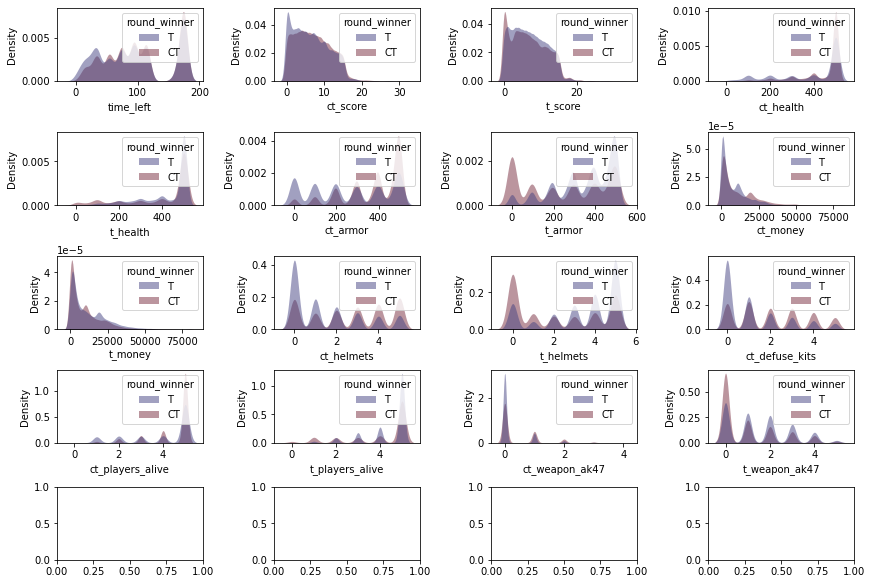

In [8]:
num_plots = len(numerical_var)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(numerical_var):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.kdeplot(
        data=df,
        x=feature,
        palette="icefire",
        alpha=0.5,
        linewidth=0,
        fill=True,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

> Some expected patterns from observing the numerical variables, for example:
when one team has a higher number in money, or apparatus, or players alive, that team tends to win.
CT side tends to win the round faster (more time left)
    

IndexError: index 2 is out of bounds for axis 0 with size 2

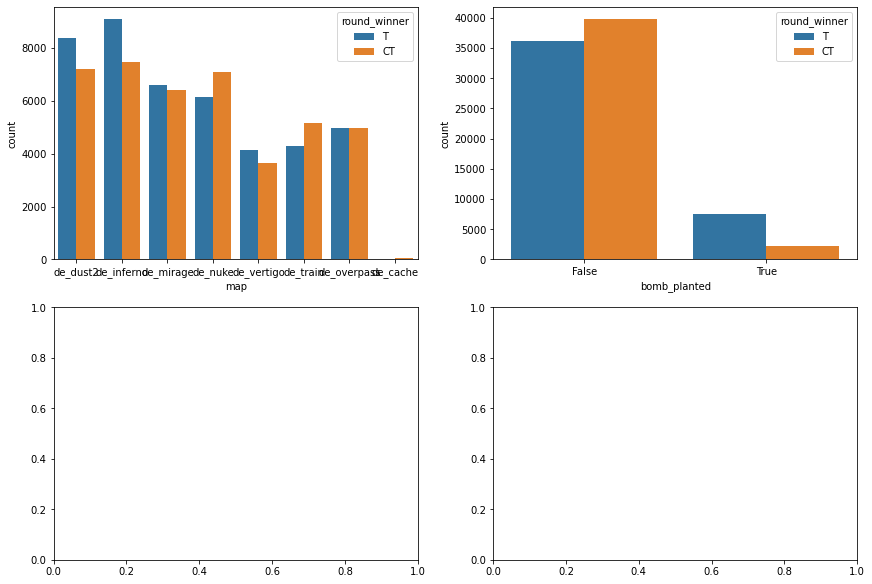

In [10]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(categorical_var):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.countplot(
        data=df,
        x=feature,
        hue="round_winner",
        ax=axs[p_row][p_col],
    )

plt.show()

> 2 maps are more favorable to T, 1 map is favorable to CT. 
> bomb_planted is important to T 


Separate the `ct_` columns and `t_` columns to study more about correlations

In [11]:
t = [colname for colname in df.columns if colname.startswith('t_')]
print(t)

['t_score', 't_health', 't_armor', 't_money', 't_helmets', 't_players_alive', 't_weapon_ak47', 't_weapon_aug', 't_weapon_awp', 't_weapon_bizon', 't_weapon_cz75auto', 't_weapon_elite', 't_weapon_famas', 't_weapon_g3sg1', 't_weapon_galilar', 't_weapon_glock', 't_weapon_m249', 't_weapon_m4a1s', 't_weapon_m4a4', 't_weapon_mac10', 't_weapon_mag7', 't_weapon_mp5sd', 't_weapon_mp7', 't_weapon_mp9', 't_weapon_negev', 't_weapon_nova', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 't_weapon_scar20', 't_weapon_sg553', 't_weapon_ssg08', 't_weapon_ump45', 't_weapon_xm1014', 't_weapon_deagle', 't_weapon_fiveseven', 't_weapon_usps', 't_weapon_p250', 't_weapon_p2000', 't_weapon_tec9', 't_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_incendiarygrenade', 't_grenade_molotovgrenade', 't_grenade_decoygrenade']


We can largely group the information into 3 categories: 
1. general: timeleft, score, health, money, players_alive 
2. weapon
3. grenade
4. protective quipment: armor, helmets

Look at the correlation within one side attribute

(1.0, -1.0)

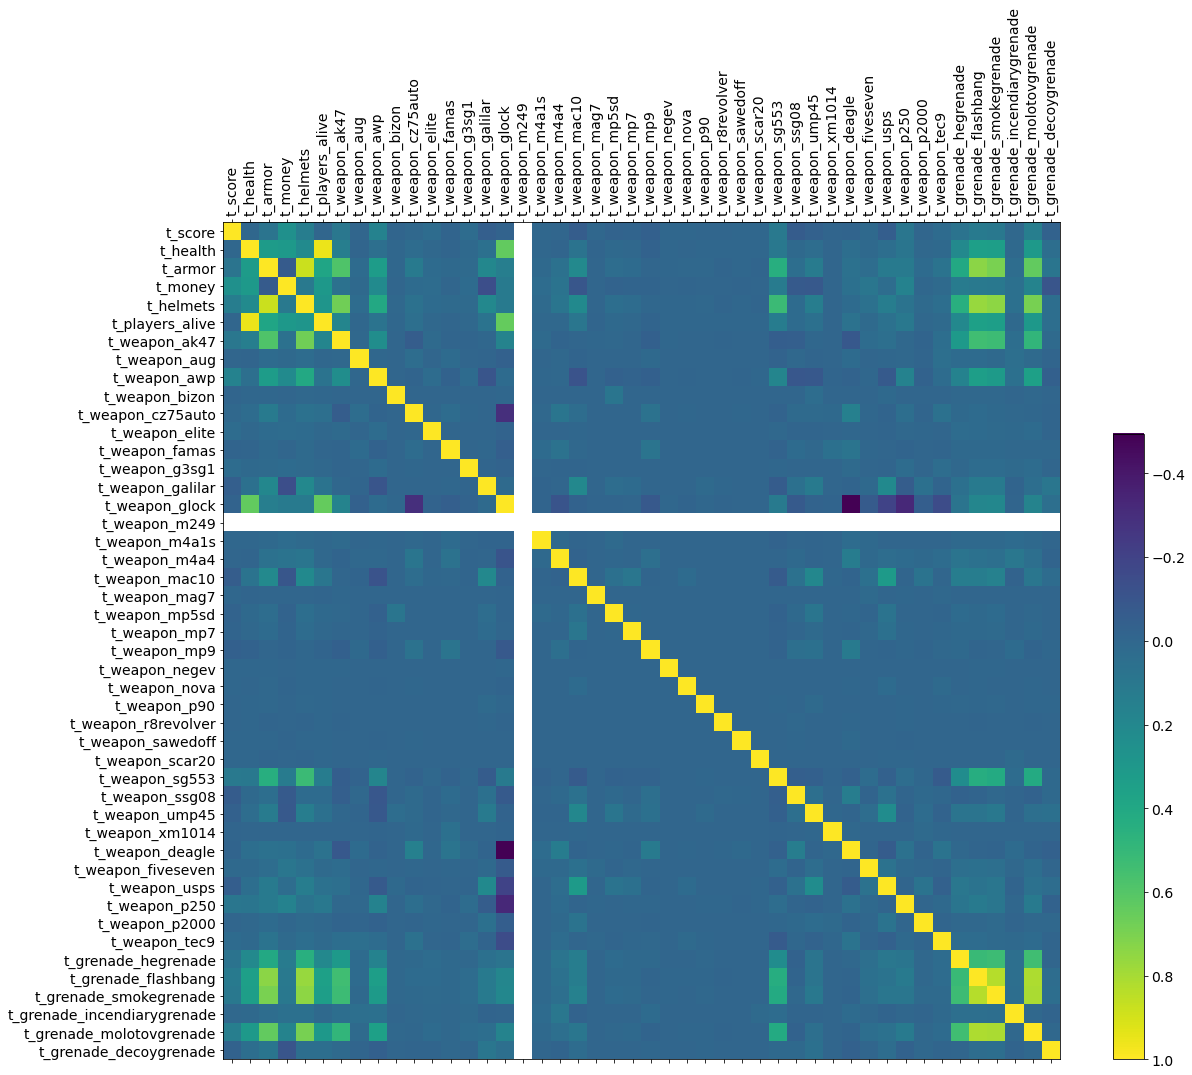

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df[t].corr(), fignum=f.number)
plt.xticks(range(df[t].shape[1]), df[t].columns, fontsize=14, rotation=90)
plt.yticks(range(df[t].shape[1]), df[t].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.ax.set_ylim(1.0, -1.0)

- players alive and health highly correlated
- armor and helmets highly correlated
- grenades are relatively highly correlated with armor and helmets
- diferent types of grenades are highly correlated with each other

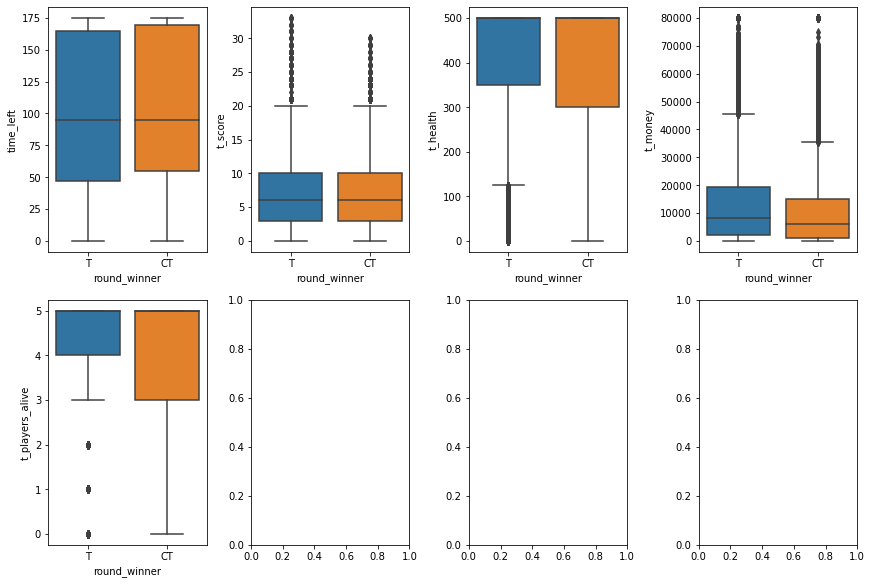

In [13]:
feature_ls = ['time_left','t_score','t_health','t_money','t_players_alive']

num_plots = len(feature_ls)
num_cols = 4
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()


`t_money` and `t_players_alive`, `t_health` 

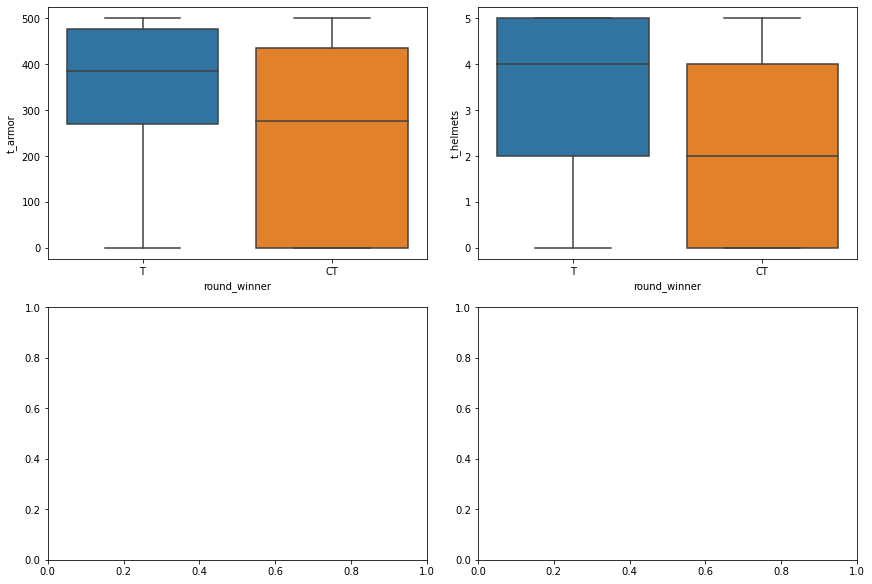

In [14]:
feature_ls = ['t_armor','t_helmets']
              
num_plots = len(feature_ls)
num_cols = 2
num_rows = num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, constrained_layout=True)
fig.set_size_inches(12, 8)

for subplot, feature in enumerate(feature_ls):
    p_row, p_col = subplot // num_cols, subplot % num_cols
    sns.boxplot(
        data=df,
        x='round_winner',
        y=feature,
        ax=axs[p_row][p_col],
    )

plt.show()

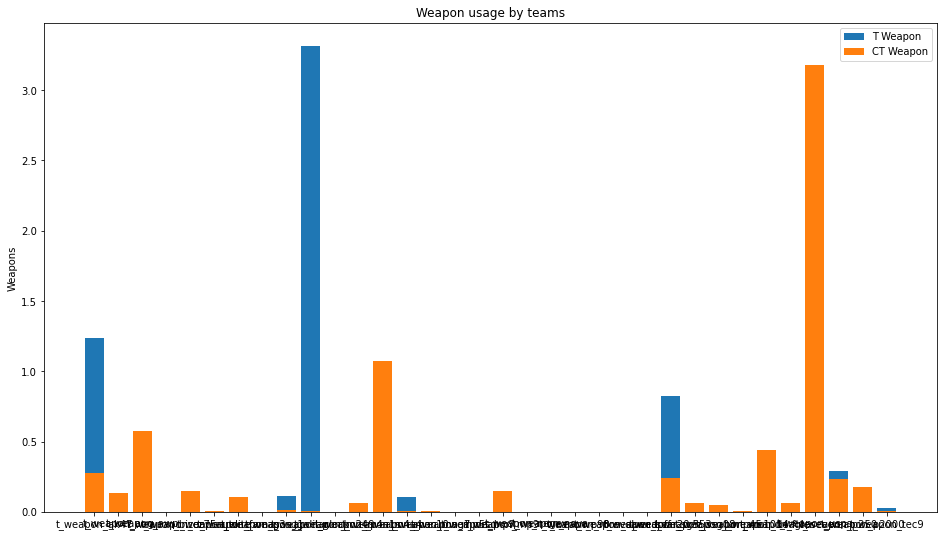

In [15]:
t_weapon = [colname for colname in df.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in df.columns if colname.startswith('ct_weapon')]

fig, ax = plt.subplots(figsize=(16,9))

t_data = df[t_weapon].mean()
ct_data = df[ct_weapon].mean()
x_pos = np.arange(len(t_weapon))

ax.bar( x_pos, t_data, label = 'T Weapon',)
ax.bar( x_pos, ct_data, label = 'CT Weapon',)

ax.set_ylabel('Weapons')
ax.set_title('Weapon usage by teams')
ax.set_xticks(x_pos)
ax.set_xticklabels(t_weapon)
ax.legend()

Weapon choices of the two sides are very different.

Text(0.5, 1.0, 'Grenades Usage')

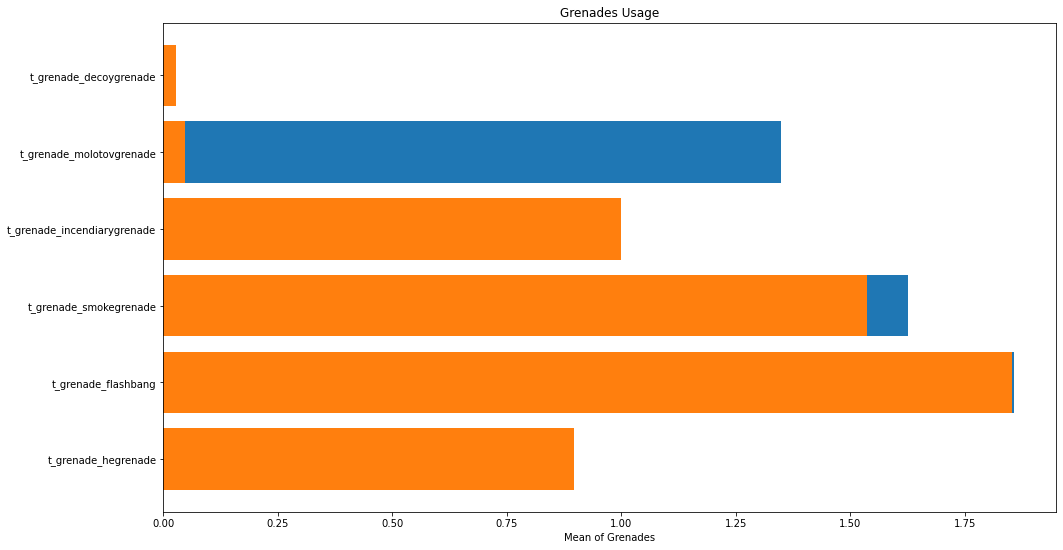

In [16]:
t_grenade = [colname for colname in df.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in df.columns if colname.startswith('ct_grenade')]

fig, ax = plt.subplots(figsize=(16,9))

x = df[t_grenade].mean()
y_pos = np.arange(len(t_grenade))

ax.barh(y_pos, x,align='center',label = 'T Grenades',)
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 

x = df[ct_grenade].mean()
y_pos = np.arange(len(ct_grenade))

ax.barh(y_pos, x,align='center', label = 'CT Grenades')
ax.set_yticks(y_pos)

ax.set_yticklabels(t_grenade)
ax.invert_yaxis() 
ax.set_xlabel('Mean of Grenades')
ax.set_title('Grenades Usage')


For feature engineering:
1. create a feature combines less used weapons, and keep the weapons that are obviously favored
2. same with grenades
3. 

## 3. Feature Engineering

Define a function to do scaling, train/test split, fitting and evaluation at once, because we will be running this multiple times

In [56]:
score = []
name = []


def rf_predictor(df,var,model_version, target='round_winner',test_size=0.3,random_state=42):
    
    # scaling variables
    scaler = StandardScaler().fit(df[var])
    X = scaler.transform(df[var])
    
    # train/test split
    X = df[var]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # fit model and make prediction
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # obtain accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    score.append(accuracy)
    name.append(model_version)

    model_performance = pd.DataFrame(data={"model": name, "Accuracy": score})
    print(model_performance)
    
    # top 13 feature importance
    
    feature_importance = pd.DataFrame({'feature':var,'importance':rf.feature_importances_})
    feature_importance.sort_values(by='importance',inplace=True, ascending = False)
    
    print(feature_importance[0:13])

#### 3.1 Before diving into FE, run a `baseline` model with all numerical features with randomForest

In [7]:
numerical_var = [i for i in df.columns if df[i].dtypes == "float64"]

rf_predictor(df = df, var=numerical_var, model_version = 'rf baseline all numerical')

                       model  Accuracy
0  rf baseline all numerical  0.846501
                 feature  importance
5               ct_armor    0.081607
6                t_armor    0.081305
8                t_money    0.055910
7               ct_money    0.055335
0              time_left    0.044757
10             t_helmets    0.044260
2                t_score    0.033991
4               t_health    0.033952
1               ct_score    0.033732
3              ct_health    0.032475
11        ct_defuse_kits    0.031637
9             ct_helmets    0.029392
84  ct_grenade_flashbang    0.026178


#### 3.2 Removing outliers - does it improve the accuracy score?

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
X, y = df[numerical_var].values, df[target].values
print("Before removing outliers:", X.shape, y.shape)

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

mask = yhat != -1
X, y = X[mask, :], y[mask]
print("After removing outliers:", X.shape, y.shape)

Before removing outliers: (85687, 94) (85687,)
After removing outliers: (77118, 94) (77118,)


In [22]:
y = pd.DataFrame(y, columns=[target])
X = pd.DataFrame(X, columns=numerical_var)

df_1 = pd.concat((X, y), axis=1)
df_1.shape

(77118, 95)

In [72]:
rf_predictor(df = df_1, var=numerical_var, model_version = 'rf baseline all numerical remove outlier')

                                      model  Accuracy
0                 rf baseline all numerical  0.844945
1  rf baseline all numerical remove outlier  0.840811
             feature  importance
0          time_left    0.046696
1           ct_score    0.033575
2            t_score    0.034236
3          ct_health    0.032838
4           t_health    0.035093
5           ct_armor    0.071672
6            t_armor    0.077988
7           ct_money    0.058177
8            t_money    0.058546
9         ct_helmets    0.031687
10         t_helmets    0.047337
11    ct_defuse_kits    0.031487
12  ct_players_alive    0.020408


> Removing outliers didn't improve the model

#### 3.2 Feature encoding
We have 1 categorical variable, `map` and 1 boolean varaible `bomb_planted`. 

Use catboost encoder

In [8]:
categorical_var = ["map", "bomb_planted"]
target = 'round_winner'

In [9]:
# Create the Catboost encoder, and "fit" + "transform" our data.

# target value has to be numerical in catboost encoder
nu_target = [1 if x == 'CT' else 0 for x in df[target] ]


# encoding 
catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(df[categorical_var],nu_target)
new_columns.add_suffix('_cb')

,map_cb,bomb_planted_cb
0,0.490191,False
1,0.490191,False
2,0.490191,False
3,0.745096,False
4,0.496730,False
...,...,...
85682,0.536471,False
85683,0.499848,False
85684,0.536506,False
85685,0.491778,False


In [10]:
data_coded = df.drop(['map','bomb_planted'],axis=1)
data_coded = pd.concat((data_coded,new_columns),axis=1)

In [11]:
var = list(set(data_coded.columns) - set([target]))

rf_predictor(df = data_coded, var=var, model_version = 'rf baseline encoded')

                       model  Accuracy
0  rf baseline all numerical  0.846501
1        rf baseline encoded  0.848057
           feature  importance
6         ct_armor    0.073590
71         t_armor    0.071041
92             map    0.051847
34         t_money    0.051733
76        ct_money    0.051511
38       t_helmets    0.045608
91       time_left    0.041499
8         t_health    0.032825
87         t_score    0.031007
41        ct_score    0.030819
10      ct_helmets    0.028027
50       ct_health    0.027699
3   ct_defuse_kits    0.027092


Adding in encoded variables did improve the model. Now need to dig deeper into the dataset itsel. 

3.3 Removing columns with constant values

In [12]:
data_coded.drop(constant_col,axis=1,inplace=True)
var = list(set(data_coded.columns) - set([target]))
rf_predictor(df = data_coded, var=var, model_version = 'rf removing constants')

                       model  Accuracy
0  rf baseline all numerical  0.846501
1        rf baseline encoded  0.848057
2      rf removing constants  0.850741
           feature  importance
66         t_armor    0.075878
6         ct_armor    0.071559
86             map    0.052501
32         t_money    0.052429
70        ct_money    0.050758
35       t_helmets    0.043749
85       time_left    0.040407
8         t_health    0.033587
81         t_score    0.031241
38        ct_score    0.030943
47       ct_health    0.030505
3   ct_defuse_kits    0.029079
10      ct_helmets    0.028802


#### 3.2 PCA

Simple feature reduction won't be enough, since we have 96 variables. Need to try PCA

In [13]:
from sklearn.decomposition import PCA

var = list(set(data_coded.columns) - set([target]))
X = data_coded[var]

pca = PCA(n_components=12, random_state=42)
features_transormed = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9999999497903573

In [14]:
df_transformed = pd.DataFrame(
    features_transormed, columns=["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']
)

df_transformed = pd.concat((df_transformed,data_coded[target]),axis=1)
pcs = ["PC1", "PC2", "PC3", "PC4", "PC5",'PC6',"PC7", "PC8", "PC9", "PC10", "PC11",'PC12']

In [15]:
rf_predictor(df = df_transformed, var = pcs, model_version= 'rf PCA')

                       model  Accuracy
0  rf baseline all numerical  0.846501
1        rf baseline encoded  0.848057
2      rf removing constants  0.850741
3                     rf PCA  0.800093
   feature  importance
3      PC4    0.235323
1      PC2    0.098071
5      PC6    0.094131
4      PC5    0.085026
2      PC3    0.076910
0      PC1    0.067823
10    PC11    0.066544
9     PC10    0.057017
11    PC12    0.057007
8      PC9    0.055573
6      PC7    0.053627
7      PC8    0.052946


Simple PCA doesn't improve the accuracy

#### 3.3 More advanced feature engineering

Manually construct variables rom highly correlated features

In [16]:
data_3 = data_coded.copy()
t_weapon = [colname for colname in data_3.columns if colname.startswith('t_weapon')]
ct_weapon = [colname for colname in data_3.columns if colname.startswith('ct_weapon')]
t_grenade = [colname for colname in data_3.columns if colname.startswith('t_grenade')]
ct_grenade = [colname for colname in data_3.columns if colname.startswith('ct_grenade')]

data_3['ct_player_health_index'] = data_3['ct_players_alive']*data_3['ct_health']
data_3['t_player_health_index'] = data_3['t_players_alive']*data_3['t_health']
data_3['ct_player_armor_helmets'] = data_3['ct_armor'] + data_3['ct_helmets']
data_3['t_player_armor_helmets'] = data_3['t_armor'] + data_3['t_helmets']
data_3['ct_total_weapons'] = data_3[ct_weapon].agg('sum',axis='columns')
data_3['t_total_weapons'] = data_3[t_weapon].agg('sum',axis='columns')
data_3['ct_total_grenades'] = data_3[ct_grenade].agg('sum',axis='columns')
data_3['t_total_grenades'] = data_3[t_grenade].agg('sum',axis='columns')



In [17]:
var = list(set(data_3.columns) - set([target]))
rf_predictor(df = data_3, var=var, model_version= 'rf manual construction' )

                       model  Accuracy
0  rf baseline all numerical  0.846501
1        rf baseline encoded  0.848057
2      rf removing constants  0.850741
3                     rf PCA  0.800093
4     rf manual construction  0.838293
                    feature  importance
73   t_player_armor_helmets    0.054811
6                  ct_armor    0.050138
54  ct_player_armor_helmets    0.048650
72                  t_armor    0.047152
94                      map    0.045902
55         ct_total_weapons    0.042589
77                 ct_money    0.042435
32                  t_money    0.042092
42          t_total_weapons    0.039891
93                time_left    0.034156
35                t_helmets    0.028842
89                  t_score    0.026607
39                 ct_score    0.026555


In [18]:
to_drop = ['ct_health','t_health','ct_armor','t_armor','ct_helmets','t_helmets','ct_players_alive','t_players_alive']
to_drop.extend(t_weapon)
to_drop.extend(ct_weapon)
to_drop.extend(t_grenade)
to_drop.extend(ct_grenade)

In [19]:
data_4 = data_3.drop(to_drop,axis=1)

In [20]:
var = list(set(data_4.columns) - set([target]))
rf_predictor(df = data_4, var=var, model_version= 'rf manual construction remove excess' )

                                  model  Accuracy
0             rf baseline all numerical  0.846501
1                   rf baseline encoded  0.848057
2                 rf removing constants  0.850741
3                                rf PCA  0.800093
4                rf manual construction  0.838293
5  rf manual construction remove excess  0.822111
                    feature  importance
13   t_player_armor_helmets    0.107129
5   ct_player_armor_helmets    0.105376
12          t_total_weapons    0.093161
10                      map    0.083612
6                   t_money    0.080122
1                  ct_money    0.079207
11                time_left    0.064289
4          ct_total_weapons    0.064231
15        ct_total_grenades    0.050382
9     t_player_health_index    0.047453
3          t_total_grenades    0.045548
8                   t_score    0.045539
14                 ct_score    0.044810


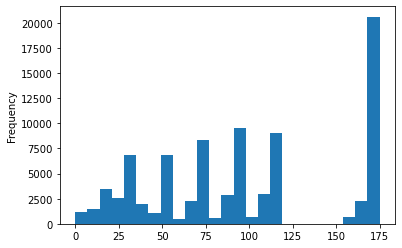

In [145]:
df['time_left'].plot.hist(bins=25)

In [21]:
data_5 = data_coded.copy()

time_bucket = []

for x in data_5['time_left']:
    if x <25:
        time_bucket.append('t25')
    elif x >= 25 and x < 50:
        time_bucket.append('t50')
    elif x >= 50 and x < 75:
        time_bucket.append('t75')
    elif x >= 75 and x < 100:
        time_bucket.append('t100')
    elif x >= 100 and x < 125:
        time_bucket.append('t125')
    elif x >= 125 and x < 150:
        time_bucket.append('t150')
    else:
        time_bucket.append('t175')

data_5['time_bucket'] = time_bucket

In [19]:
data_5.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,t_weapon_r8revolver,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,map,bomb_planted,time_bucket
0,109.95,10.0,7.0,500.0,500.0,86.0,483.0,14900.0,10400.0,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,T,0.490191,False,t125
1,114.95,15.0,14.0,500.0,500.0,471.0,500.0,22700.0,3500.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,5.0,2.0,4.0,0.0,1.0,3.0,0.0,0.0,CT,0.490191,False,t125
2,174.95,9.0,13.0,500.0,500.0,473.0,0.0,32300.0,21600.0,5.0,0.0,3.0,5.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT,0.490191,False,t175
3,34.93,14.0,15.0,468.0,489.0,495.0,495.0,2850.0,2250.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T,0.745096,False,t50
4,74.94,3.0,2.0,497.0,400.0,500.0,400.0,5600.0,3050.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,T,0.496730,False,t75


In [155]:
data_5.groupby('time_bucket').agg({'time_bucket':'size',
                                   'ct_score':['mean','min','max'],
                                   't_score':['mean','min','max'],
                                   'ct_player_health_index':['mean','min','max'],
                                   't_player_health_index':['mean','min','max']
                                   
                                  })

time_bucket  ct_score              t_score            ct_player_health_index                t_player_health_index               
                   size      mean  min   max      mean  min   max                   mean    min     max                  mean    min     max
time_bucket                                                                                                                                 
t100              13357  6.763270  0.0  32.0  6.770607  0.0  33.0            2143.445384    9.0  2500.0           2055.043348    4.0  2500.0
t125              12529  6.678426  0.0  32.0  6.684332  0.0  33.0            2494.855455  900.0  2500.0           2494.628542  396.0  2500.0
t175              23572  6.741515  0.0  32.0  6.794884  0.0  33.0            2493.827422    0.0  2500.0           2496.508569    0.0  2500.0
t25                7348  6.546543  0.0  32.0  6.746053  0.0  33.0             567.566549    1.0  2500.0            727.747823    0.0  2500.0
t50               11814  6.792619  0.0  32.0  6.916455  0.0  33.0            1043.386406    1.0  2500.0           1019.089385    0.0  2500.0
t75               17067  6.669889  0.0  32.0  6.694088  0.0  32.0            1694.432296    1.0  2500.0           1543.221421    1.0  2500.0

In [22]:
d5_target = [1 if x == 'CT' else 0 for x in data_5[target] ]

# encoding 
catboost_enc = ce.CatBoostEncoder()
new_columns = catboost_enc.fit_transform(data_5['time_bucket'],d5_target)
new_columns.add_suffix('_cb')

data_5_coded = pd.concat((data_5,new_columns),axis=1)


In [23]:
data_5_coded.drop(['time_bucket','time_left'],axis=1,inplace=True)

In [24]:
var = list(set(data_5_coded.columns) - set([target]))
rf_predictor(df = data_5_coded, var=var, model_version= 'rf with time buckets' )

                                  model  Accuracy
0             rf baseline all numerical  0.846501
1                   rf baseline encoded  0.848057
2                 rf removing constants  0.850741
3                                rf PCA  0.800093
4                rf manual construction  0.838293
5  rf manual construction remove excess  0.822111
6                  rf with time buckets  0.853620
           feature  importance
6         ct_armor    0.076264
66         t_armor    0.070047
85             map    0.057498
32         t_money    0.055614
70        ct_money    0.054526
35       t_helmets    0.050055
8         t_health    0.034535
10      ct_helmets    0.032747
81         t_score    0.032714
38        ct_score    0.032191
47       ct_health    0.030693
3   ct_defuse_kits    0.028790
51   t_weapon_ak47    0.027193


PCA REVERSE

In [50]:
var = list(set(data_5_coded.columns) - set([target]))
X = data_5_coded[var]

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print(sum(pca.explained_variance_ratio_))



0.9998405050556468


In [51]:
X_new = pca.inverse_transform(X_pca)
X_new.shape

(85687, 89)

In [52]:
df_transformed = pd.DataFrame(
    X_new, columns=var
)

df_transformed = pd.concat((df_transformed,data_5_coded[target]),axis=1)


In [57]:
var = list(set(df_transformed.columns) - set([target]))
rf_predictor(df = df_transformed, var=var, model_version= 'inversed pca based on data_5_coded')

                                model  Accuracy
0  inversed pca based on data_5_coded  0.726378
                        feature  importance
32                      t_money    0.023565
70                     ct_money    0.022849
14                t_weapon_usps    0.017616
18              ct_weapon_glock    0.016273
81                      t_score    0.016259
79           t_weapon_fiveseven    0.015733
38                     ct_score    0.015512
85                          map    0.015479
43                ct_weapon_mp7    0.014661
74               t_weapon_m4a1s    0.014190
20                t_weapon_m4a4    0.013808
53  t_grenade_incendiarygrenade    0.013791
88                 t_weapon_aug    0.013766


In [55]:
# name

## Model Selection 

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


classifiers = [
#     KNeighborsClassifier(2),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB()
#     QuadraticDiscriminantAnalysis()
#     LinearSVC(random_state=1)
#     SGDClassifier()
     GradientBoostingClassifier()
    
]

accuracy = []
names = []

X = data_5_coded[var]
y = data_5_coded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
    
for cl in classifiers:
    name = cl.__class__.__name__
          
    cl.fit(X_train,y_train)
    y_pred=cl.predict(X_test)
    
    model_metrics = accuracy_score(y_test, y_pred)
    
    try:
        names.append(name)
        accuracy.append(model_metrics)
        
    except:
        continue

data = {"Classifier":names, "Accuracy": accuracy}

perf_df = pd.DataFrame(data)

print(perf_df)

                   Classifier  Accuracy
0  GradientBoostingClassifier  0.756487


### Random Forest is giving us the best result so far, next, perform hyperparameter tuning with cross validation


In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint.pp(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}


In [ ]:
X = data_5_coded[var]
y = data_5_coded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.4min


## Final evaluation 

In [ ]:
val_data = pd.read_csv('validation_set.csv')
target = 'round_winner'
features = [column for column in data.columns if column != target]

X_val = data[features]
y_val = data[target]

# REPEAT ALL THE PROCESSING ON X_VAL

# call predict
